### Libraries

In [1]:
import requests
import lxml
from bs4 import BeautifulSoup as bs
from datetime import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

In [2]:
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can','cannot',
             'could','dear','did','do','does','either','else','ever','every','for','from','get',
             'got','had','has','have','he','her','hers','him','his','how','however','i','if','in',
             'into','is','it','its','just','least','let','like','likely','may','me','might','most',
             'must','my','neither','no','nor','not','of','off','often','on','only','or','other','our',
             'own','rather','said','say','says','she','should','since','so','some','than','that','the',
             'their','them','then','there','these','they','this','tis','to','too','twas','us','wants',
             'was','we','were','what','when','where','which','while','who','whom','why','will','with',
             'would','yet','you','your','ourselves','between','yourself','again','once','during','out',
             'very','having','yours','such','itself','s','each','themselves', 'until', 'below','through',
             'don','more','himself','down','above','both','up','ours','before','same','yourselves','over',
             'now','under','herself','myself','those','few','t','being','theirs','against','doing','further','here']

def remove_stop_words(wordlist, stopwords = STOPWORDS):
    marked = []
    # ask for sentence if wordlist is empty
    if not wordlist:
        sentence = raw_input("type a sentence: ")
        wordlist = sentence.split()
    for key in wordlist:
        if key.lower() in stopwords:
            # marked.append('')
            pass
        else:
            marked.append(key)
    return marked

### Codes

set datetime index

In [4]:
start_date = datetime(2023,1,1)
start_date = str(start_date)[:10]

end_date = datetime(2023,5,22)
end_date = str(end_date)[:10]

cd_min = start_date[6:7] + '/' + start_date[8:10] + '/' + start_date[:4]
cd_max = end_date[6:7] + '/' + end_date[8:10] + '/' + end_date[:4]

tbs = f'cdr:1,cd_min:{cd_min},cd_max:{cd_max}'

검색어 지정 후 crawling

In [5]:
search = 'generative ai'

header = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}
cookie = {'CONSENT' : 'YES'}
url = 'https://www.google.com/search?'
pList = []
for i in range(1, 51) :
    params = {'q' : search , 'hl' : 'ko', 'tbm' : 'nws', 'tbs' : tbs, 'start' : str(i)+'0'}
    res = requests.get(url, params = params, headers = header, cookies = cookie)
    soup = bs(res.text, 'lxml')
    pList.append(soup)

In [6]:
q_List = []
for i in range(len(pList)) :
    list_p = pList[i].find_all('div')
    for j in list_p :
        q_List.append(j.get_text())
verbose = ''
for i in q_List :
    if i.isascii() and (i != '') :
        verbose += i

string_without_newline = re.sub(r"\n", " ", verbose)
string_without_special_chars = re.sub(r"[^a-zA-Z가-힣\s]", "", string_without_newline)

Tokenization

In [9]:
# 토큰화
tokens = word_tokenize(verbose)

# 정제
cleaned_tokens = [token.lower() for token in tokens if token.isalpha()]
cleaned_tokens = remove_stop_words(cleaned_tokens, stopwords = STOPWORDS)

# 단어 빈도 분석
freq_dist = FreqDist(cleaned_tokens)
freq_dist = dict(freq_dist.most_common(200)[2:])

# 출력
print(freq_dist)

{'new': 69, 'artificial': 57, 'intelligence': 56, 'chatgpt': 39, 'use': 37, 'data': 36, 'openai': 34, 'technology': 33, 'latest': 33, 'tech': 31, 'tools': 28, 'software': 28, 'content': 25, 'lawsuits': 25, 'legal': 24, 'nvidia': 24, 'today': 22, 'announced': 22, 'create': 21, 'language': 20, 'companies': 19, 'develop': 19, 'shutterstock': 18, 'text': 16, 'video': 16, 'models': 16, 'help': 16, 'google': 16, 'images': 16, 'tool': 15, 'industries': 15, 'product': 15, 'gpt': 14, 'based': 14, 'even': 14, 'policy': 14, 'big': 14, 'advances': 14, 'assist': 13, 'platform': 13, 'race': 13, 'image': 13, 'way': 13, 'known': 13, 'billion': 13, 'drug': 13, 'education': 13, 'cover': 13, 'part': 13, 'products': 13, 'einstein': 12, 'blazing': 12, 'systems': 12, 'recent': 12, 'expands': 12, 'creators': 12, 'brand': 12, 'created': 12, 'monopoly': 12, 'behind': 12, 'iphone': 12, 'update': 12, 'section': 12, 'gtc': 12, 'feature': 12, 'using': 12, 'poised': 12, 'include': 12, 'partnership': 11, 'questions'

(-0.5, 1999.5, 1599.5, -0.5)

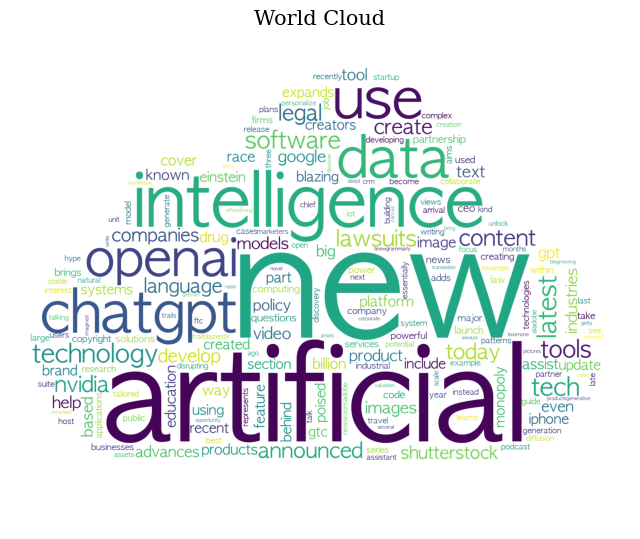

In [10]:
im = Image.open('cloud.png')
mask_arr = np.array(im)

wc = WordCloud(font_path='AppleGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(freq_dist)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("World Cloud", fontsize = 15, fontfamily = 'Serif')
plt.axis('off')

In [27]:
import pandas as pd
import numpy as np

freq_df = pd.DataFrame(freq_dist.values(), index = freq_dist.keys(), columns = ['value'])

In [29]:
freq_df.iloc[:50]

,value
new,69
artificial,57
intelligence,56
chatgpt,39
use,37
data,36
openai,34
technology,33
latest,33
tech,31


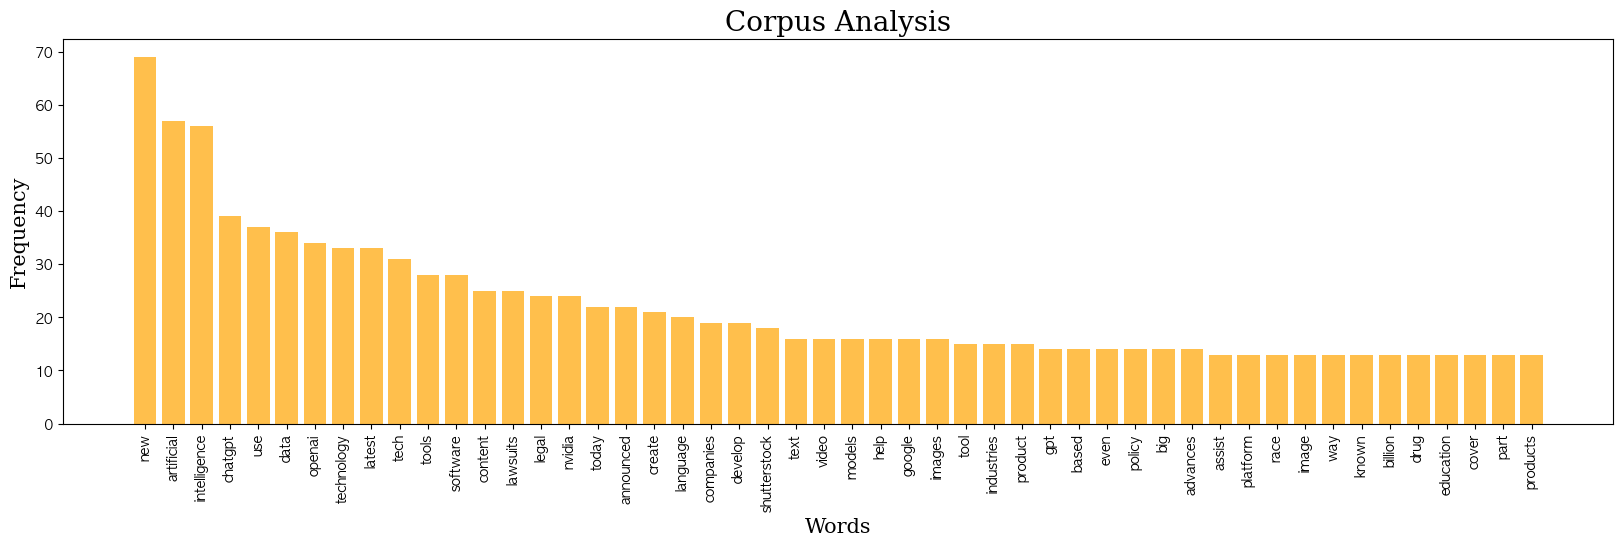

In [55]:
plt.figure(figsize = (20,5))
plt.rc('font', family = 'AppleGothic')
plt.bar(freq_df.iloc[:50].index, freq_df.iloc[:50]['value'], alpha = 0.7, color = 'orange')
plt.xticks(rotation = 90)
plt.ylabel('Frequency', fontsize = 15, fontfamily = 'Serif')
plt.xlabel('Words', fontsize = 15, fontfamily = 'Serif')
plt.title('Corpus Analysis', fontsize = 20, fontfamily = 'Serif')
plt.show()

In [69]:
import pytrends as pt
from pytrends.request import TrendReq
import plotly.express as px

pytrends = TrendReq(hl = 'en-US', tz = 360)

keyword_list = ['generative ai','metaverse','block chain','NFT'] #한번에 5개 키워드 제한

try:
    pytrends.build_payload(keyword_list, cat=0, timeframe='today 2-y', geo='US', gprop='')
    data = pytrends.interest_over_time()
    data = data.reset_index()
    print(data.head())

except:
    for e in keyword_list:
        print(e, "couldn't be done")

figure = px.line(data, x = "date", y = keyword_list, title = "Google Trend")
figure.show()

generative ai couldn't be done
metaverse couldn't be done
block chain couldn't be done
NFT couldn't be done


In [79]:
df = pd.DataFrame(data.iloc[:,1:-1].values, index = data.date, columns = data.columns[1:-1])
df

,generative ai,metaverse,block chain,NFT
date,,,,
2018-05-27,0,0,1,0
2018-06-03,0,0,1,0
2018-06-10,0,0,1,0
2018-06-17,0,0,1,0
2018-06-24,0,0,1,0
...,...,...,...,...
2023-04-16,2,2,0,7
2023-04-23,2,2,0,6
2023-04-30,2,2,0,11


In [84]:
figure = px.line(df.cumsum(), x = data.date, y = keyword_list, title = "Google Trend")
figure.show()

In [85]:
start_date = datetime(2022,12,31)
start_date = str(start_date)[:10]

end_date = datetime(2023,1,15)
end_date = str(end_date)[:10]

cd_min = start_date[6:7] + '/' + start_date[8:10] + '/' + start_date[:4]
cd_max = end_date[6:7] + '/' + end_date[8:10] + '/' + end_date[:4]

tbs = f'cdr:1,cd_min:{cd_min},cd_max:{cd_max}'

In [86]:
search = 'generative ai'

header = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}
cookie = {'CONSENT' : 'YES'}
url = 'https://www.google.com/search?'
pList = []
for i in range(1, 20) :
    params = {'q' : search , 'hl' : 'ko', 'tbm' : 'nws', 'tbs' : tbs, 'start' : str(i)+'0'}
    res = requests.get(url, params = params, headers = header, cookies = cookie)
    soup = bs(res.text, 'lxml')
    pList.append(soup)

In [87]:
q_List = []
for i in range(len(pList)) :
    list_p = pList[i].find_all('div')
    for j in list_p :
        q_List.append(j.get_text())
verbose = ''
for i in q_List :
    if i.isascii() and (i != '') :
        verbose += i

string_without_newline = re.sub(r"\n", " ", verbose)
string_without_special_chars = re.sub(r"[^a-zA-Z가-힣\s]", "", string_without_newline)

In [89]:
# 토큰화
tokens = word_tokenize(verbose)

# 정제
cleaned_tokens = [token.lower() for token in tokens if token.isalpha()]
cleaned_tokens = remove_stop_words(cleaned_tokens, stopwords = STOPWORDS)

# 단어 빈도 분석
freq_dist = FreqDist(cleaned_tokens)
freq_dist = dict(freq_dist.most_common(200)[5:])

# 출력
print(freq_dist)

{'content': 81, 'use': 74, 'art': 74, 'startup': 73, 'technology': 69, 'images': 68, 'create': 68, 'chatgpt': 68, 'data': 67, 'generate': 66, 'tools': 63, 'models': 61, 'using': 61, 'platform': 59, 'first': 56, 'raises': 55, 'text': 54, 'one': 50, 'tech': 46, 'learning': 43, 'creative': 43, 'jasper': 42, 'year': 42, 'business': 38, 'artists': 37, 'tool': 36, 'uses': 36, 'algorithms': 32, 'build': 31, 'machine': 31, 'million': 31, 'design': 31, 'image': 31, 'next': 30, 'systems': 30, 'work': 30, 'announced': 30, 'technologies': 30, 'openai': 30, 'model': 27, 'future': 27, 'world': 26, 'research': 26, 'existing': 26, 'type': 25, 'used': 25, 'allows': 24, 'power': 24, 'language': 24, 'including': 24, 'human': 24, 'software': 24, 'chatbot': 24, 'help': 24, 'conversational': 24, 'videos': 24, 'bring': 24, 'gan': 24, 'labs': 24, 'breakthrough': 24, 'android': 24, 'trends': 21, 'launches': 21, 'legal': 20, 'diffusion': 20, 'creativity': 20, 'venture': 20, 'market': 19, 'enable': 19, 'video': 

(-0.5, 1999.5, 1599.5, -0.5)

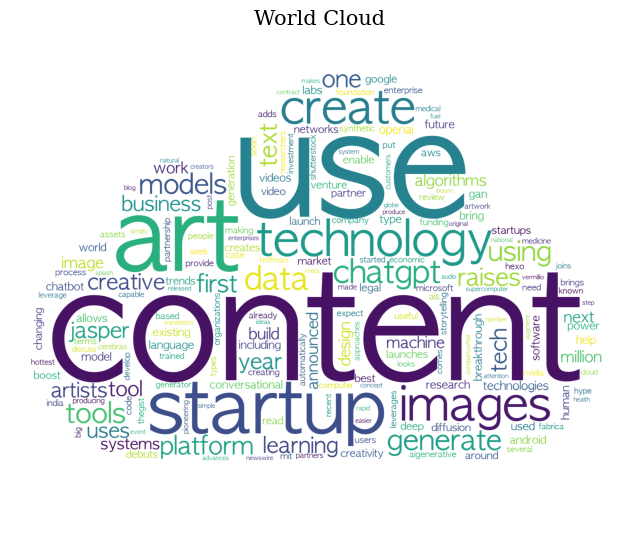

In [90]:
im = Image.open('cloud.png')
mask_arr = np.array(im)

wc = WordCloud(font_path='AppleGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(freq_dist)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("World Cloud", fontsize = 15, fontfamily = 'Serif')
plt.axis('off')